# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

Unsupervised machine learning involves a wide variety of tasks where unlike supervised learning there's no target value to be predicted. Instead, the job of the unsupervised learning algorithm is to take the raw data and capture some interesting structure in it.

This is useful for a number of scenarios, to explore and visualize the structure in a complex dataset, to do density estimation, to predict the probabilities of events, to compress the data, to extract more effective features before applying a supervised learning algorithm, or to discover important structures like clusters of similar objects or unusual or individual outliers in the data.

All of these and other unsupervised learning tasks have in common the property that there are no target values, labels or output to learn from or to be predicted. Instead, we only have the unlabeled samples in the dataset as input.

So in this set of notes, we'll give a brief survey of unsupervised learning methods divided into two major categories. First we'll look at one family of unsupervised methods called transformations, because they essentially just run the original data through some kind of useful process that extracts or computes information of some kind. Then we'll look at the other broad family of unsupervised learning methods which are the clustering methods. These find groups in the data and assign every point in the dataset to one of the groups. 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('readonly/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

One method called density estimation is used when you have a set of measurements scattered throughout an area. And you want to create what you can think of as a smooth version over the whole area that gives a general estimate for how likely it would be to observe a particular measurement in some area of that space.

Often, density estimates are then used in further machine learning stages as part of providing features for classification or regression. The more technical way to say this is that density estimation calculates a continuous probability density over the feature space given a set of discrete samples in that feature space.

With this density estimate, we can estimate how likely any given combination of features is to occur. In Scikit-Learn, you can use the kernel density class in the sklearn.neighbors module to perform one widely used form of density estimation called kernel density estimation.

## Dimensionality Reduction and Manifold Learning

Another very important family of unsupervised learning methods that fall into the transformation category are known as dimensionality reduction algorithms. As the name suggests, this kind of transform takes your original dataset that might contain say, 200 features and finds an approximate version of dataset that uses, say, only 10 dimensions. One very common need for dimensionality reduction arises when first exploring a dataset, to understand how the samples may be grouped or related to each other by visualizing it using a two-dimensional scatterplot.

### Principal Components Analysis (PCA)

One very important form of dimensionality reduction is called principal component analysis, or PCA. Intuitively, what PCA does is take your cloud of original data points and finds a rotation of it. So the dimensions are statistically uncorrelated. PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset.

#### Using PCA to find the first two principal components of the breast cancer dataset

Here's an example of using scikit learn to apply PCA to a higher dimensional dataset, the breast cancer dataset. To perform PCA, we import the PCA class from sklearn.decomposition. It's important to first transform the dataset so that each features range of values has zero mean and unit variance. And we can do this using the fit and transform methods of the standard scalar class. 

We then create the PCA object, specify that we want to retain just the first two principal components to reduce the dimensionality to just two columns and call the fit method using our normalized data. This will set up PCA so that it learns the right rotation of the dataset. We can then apply this properly prepared PCA object to project all the points in our original input dataset to this new two-dimensional space. 

Notice here since we're not doing supervised learning in evaluating a model against a test set, we don't have to split our dataset into training and test sets. 

You see that if we take the shape of the array that's returned from PCA, it's transformed our original dataset with 30 features into a new array that has just two columns, essentially expressing each original data point in terms of two new features representing the position of the data point in this new two-dimensional PCA space. 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the PCA-transformed version of the breast cancer dataset

We can then create a scatterplot that uses these two new features to see how the data forms clusters. In this example, we've used the dataset that has labels for supervised learning; namely, the malignant and benign labels on cancer cells. So we can see how well PCA serves to find clusters in the data. 

Here's the result of plotting all the 30 feature data samples using the two new features computed with PCA. We can see that the malignant and benign cells do indeed tend to cluster into two groups in the space. In fact, we could now apply a linear classifier to this two-dimensional representation of the original dataset and we can see that it would likely do fairly well. This illustrates another use of dimensionality reduction methods like PCA to find informative features that could then be used in a later supervised learning stage. 

<IPython.core.display.Javascript object>


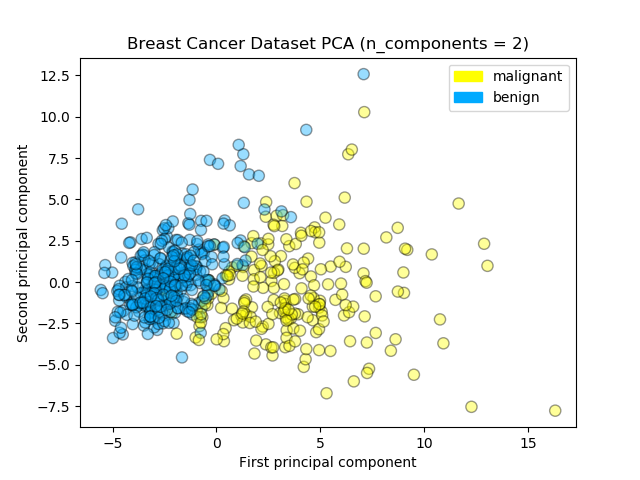

In [3]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

We can create a heat map that visualizes the first two principal components of the breast cancer dataset to get an idea of what feature groupings each component is associated with. Note that we can get the arrays representing the two principal component axes that define the PCA space using the PCA.components_ attribute that's filled in after the PCA fit method is used on the data. 

We can see that the first principle component is all positive, showing a general correlation between all 30 features. In other words, they tend to vary up and down together. The second principle component has a mixture of positive and negative signs; but in particular, we can see a cluster of negatively signed features that co-vary together and in the opposite direction of the remaining features. Looking at the names, it makes sense the subset wold co-vary together. We see the pair mean texture and worst texture and the pair mean radius and worst radius varying together and so on. 

<IPython.core.display.Javascript object>


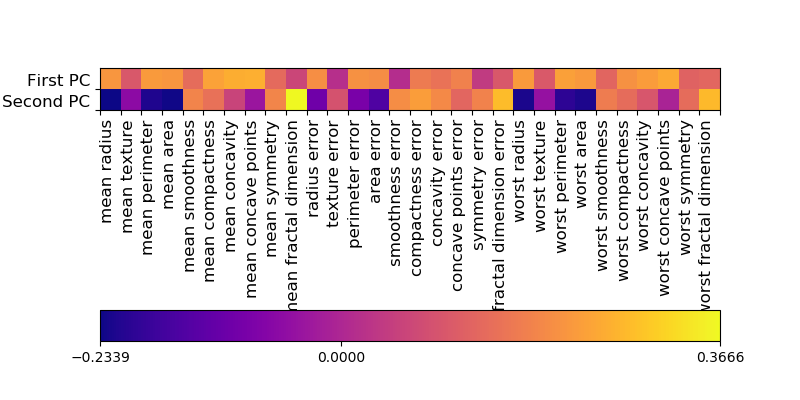

In [4]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA on the fruit dataset (for comparison)

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


<IPython.core.display.Javascript object>


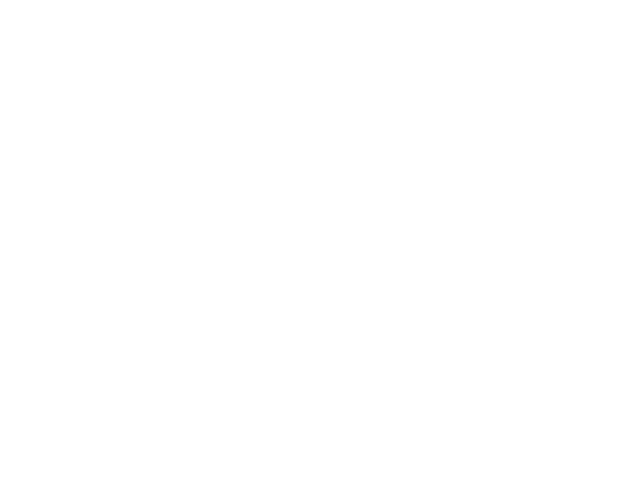

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c =     fruit_label
0             0
1             0
2             0
3             1
4             1
5             1
6             1
7             1
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            2
25            2
26            2
27            2
28            2
29            2
30            2
31            2
32            2
33            2
34            2
35            2
36            2
37            2
38            2
39            2
40            2
41            2
42            2
43            3
44            3
45            3
46            3
47            3
48            3
49            3
50            3
51            3
52            3
53            3
54            3
55            3
56            3
57            3
58            3.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

PCA gives a good initial tool for exploring a dataset, but may not be able to find more subtle groupings that produce better visualizations for more complex datasets. There is a family of unsupervised algorithms called Manifold Learning Algorithms that are very good at finding low dimensional structure in high dimensional data and are very useful for visualizations. 

#### Multidimensional scaling (MDS) on the fruit dataset

One widely used manifold learning method is called multi-dimensional scaling, or MDS. There are many flavors of MDS, but they all have the same general goal; to visualize a high dimensional dataset and project it onto a lower dimensional space - in most cases, a two-dimensional page - in a way that preserves information about how the points in the original data space are close to each other. In this way, you can find and visualize clustering behavior in your high dimensional data. 

Using a technique like MDS and scikit learn is quite similar to using PCA. Like with PCA, each feature should be normalized so its feature values have zero mean and unit variance. After importing the MDS class from sklearn.manifold and transforming the input data, you create the MDS object, specifying the number of components - typically set to two dimensions for visualization. You then fit the object using the transform data, which will learn the mapping, and then you can apply the MDS mapping to the transformed data. 

Here's an example of applying MDS to the fruit dataset. And you can see it does a pretty good job of visualizing the fact that the different fruit types do indeed tend to cluster into groups. 

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


<IPython.core.display.Javascript object>


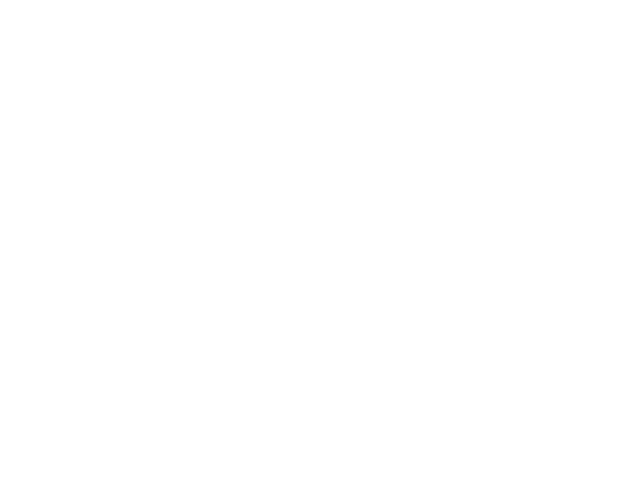

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c =     fruit_label
0             0
1             0
2             0
3             1
4             1
5             1
6             1
7             1
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            2
25            2
26            2
27            2
28            2
29            2
30            2
31            2
32            2
33            2
34            2
35            2
36            2
37            2
38            2
39            2
40            2
41            2
42            2
43            3
44            3
45            3
46            3
47            3
48            3
49            3
50            3
51            3
52            3
53            3
54            3
55            3
56            3
57            3
58            3.

In [6]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


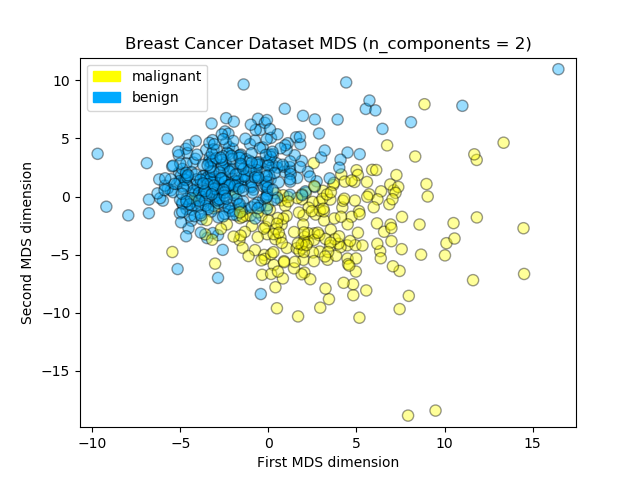

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the fruit dataset

An especially powerful manifold learning algorithm for visualizing your data is called **t-SNE**. t-SNE finds a two-dimensional representation of your data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset. In particular, t-SNE gives much more weight to preserving information about distances between points that are neighbors. 

Here's an example of applying t-SNE on the fruit dataset. The code is very similar to applying MDS and essentially just replaces MDS with t-SNE. The interesting thing here is that t-SNE does a poor job of finding structure in this rather small and simple fruit dataset, which reminds us that we should try at least a few different approaches when visualizing data using manifold learning to see which works best for a particular dataset. t-SNE tends to work better on datasets that have more well-defined local structure; in other words, more clearly defined patterns of neighbors.

<IPython.core.display.Javascript object>


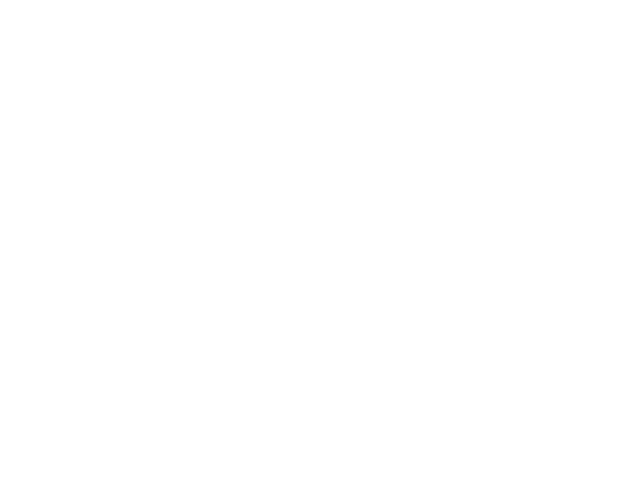

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c =     fruit_label
0             0
1             0
2             0
3             1
4             1
5             1
6             1
7             1
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            2
25            2
26            2
27            2
28            2
29            2
30            2
31            2
32            2
33            2
34            2
35            2
36            2
37            2
38            2
39            2
40            2
41            2
42            2
43            3
44            3
45            3
46            3
47            3
48            3
49            3
50            3
51            3
52            3
53            3
54            3
55            3
56            3
57            3
58            3.

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


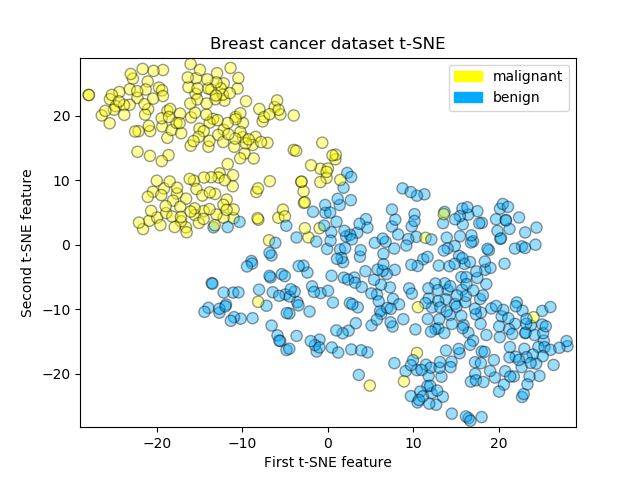

In [9]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## Clustering

The goal of clustering is to find a way to divide up a data set into groups called clusters, so that groups with similar data instances are assigned to the same cluster, while very dissimilar objects are assigned to different clusters. 

If new data points were being added over time, some clustering algorithms could also predict which cluster a new data instance should be assigned to. This is similar to classification, but without being able to train the clustering model using label examples in advanced.

### K-means

One of the most widely used clustering algorithms is called k-means clustering. K-means clustering finds k cluster centers in different regions of the feature space that it thinks represent very different groups. 

You need to specify the value of k ahead of time, which is one of the draw backs of k-means. For some problems, we may know the number of classes the data should fall into, but for many other tasks, we might not. K-means operates by first randomly picking locations for the k-cluster centers. Then it goes back and forth between two steps.

In the first step, given the locations of existing cluster centers, it assigns each data point to a cluster center based on its distance from the center. In other words, it assigns each data point to the closest center. Then in the second step, it adjusts the locations of each cluster center. It does this by setting the new cluster center to the mean of the positions of all the data points in that cluster. 

Somewhat magically, after running this alternating process for a while, coherent clusters do start to form. And the cluster centers and the corresponding cluster assignment for each data point eventually settled down to something stable. 

Now one aspect of k means is that different random starting points for the cluster centers often result in very different clustering solutions. So typically, the k-means algorithm is run in scikit-learn with ten different random initializations, and the solution occurring the most number of times is chosen.

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

K-means clustering is simple to apply in scikit learn. You import the KMeans class from sklearn.cluster, create the KMeans object set into value of k by specifying the n cluster parameter, and then calling the fit method on the dataset to run the algorithm.

One distinction should be made here between clustering algorithms that can predict which center new data points should be assigned to, and those that cannot make such predictions. K-means supports the predict method, and so we can call the fit and predict methods separately. Later methods we'll look at like agglomerative clustering do not and must perform the fit and predict in a single step, as we'll see.

<IPython.core.display.Javascript object>


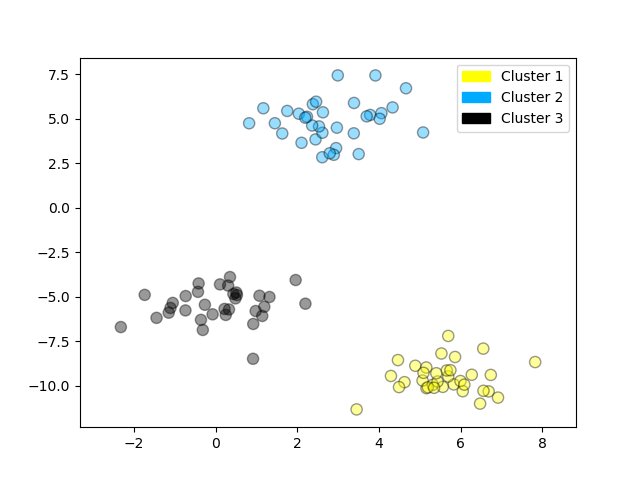

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Note that kmeans is very sensitive to the range of feature values. So if your data has features with very different ranges, it's important to normalize using min-max scaling, as we did for some supervised learning methods.

Because each cluster in k-means clustering is defined entirely by its center point, it can only capture fairly simple types of clusters. K-means clustering tends to work well when the data points form into groups of roughly the same size, with simple globular shapes that are well-separated. K-means will tend not to do well if the data forms long, irregular clusters, for example.

Also the version k-means we saw here assumed that the data features were continuous values. However, in some cases we may have categorical features, where taking the mean doesn't make sense. In that case, there are variants of k-means that can use a more general definition of distance, such as the k-medoids algorithm that can work with categorical features.

Below is an example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

D:\Python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<IPython.core.display.Javascript object>


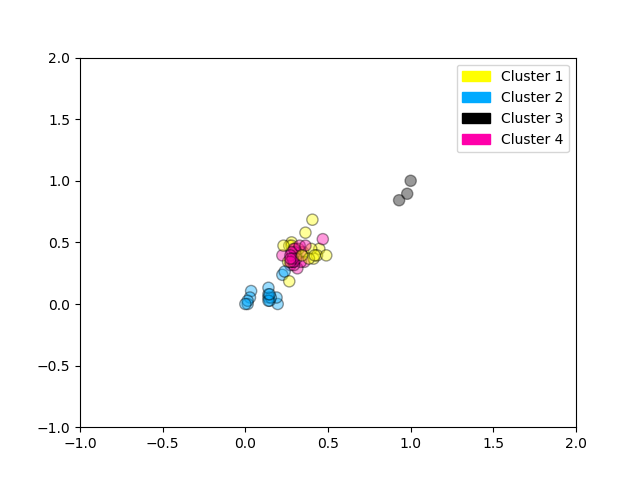

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### Agglomerative clustering

Agglomerative clustering refers to a family of clustering methods that work by doing an iterative bottom up approach. First, each data point is put into its own cluster of one item. Then, a sequence of clusterings are done where the most similar two clusters at each stage are merged into a new cluster. Then, this process is repeated until some stopping condition is met. In scikit-learn, the stopping condition is the number of clusters. 

You can choose how the agglomerative clustering algorithm determines the most similar cluster by specifying one of several possible linkage criteria. In scikit-learn, the following three linkage criteria are available, ward, average, and complete.

Ward's method chooses to merge the two clusters that give the smallest increase in total variance within all clusters. Average linkage merges the two clusters that have the smallest average distance between points. Complete linkage, which is also known as maximum linkage, merges the two clusters that have the smallest maximum distance between their points. In general, Ward's method works well on most data sets, and that's our usual method of choice. In some cases, if you expect the sizes of the clusters to be very different then it's worth trying average and complete linkage criteria as well.

To perform AgglomerativeClustering in scikit-learn, you import the agglomerative clustering class from sklearn cluster. When initializing the object, you specify the n_clusters parameter that causes the algorithm to stop when it has reach that number of clusters. You call the fit predict method using the data set as input and they return the set of cluster assignments for the data points as shown below. 

<IPython.core.display.Javascript object>


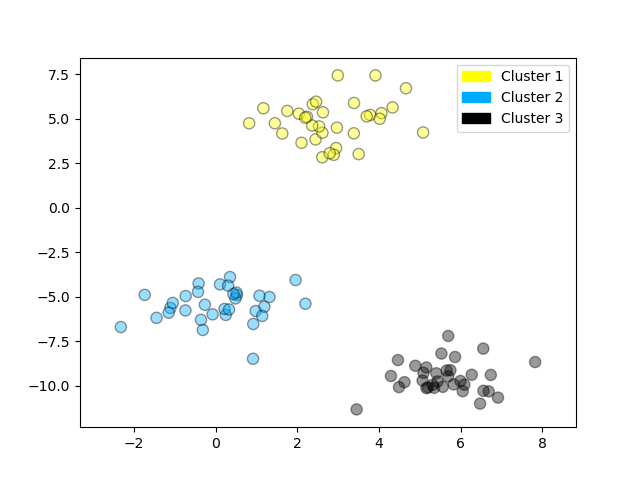

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

One of the nice things about agglomerative clustering is that it automatically arranges the data into a hierarchy as an effect of the algorithm, reflecting the order and cluster distance at which each data point is assigned to successive clusters.

#### Creating a dendrogram (using scipy)

This hierarchy can be useful to visualize using what's called a dendrogram, which can be used even with higher dimensional data. 

Scikit-learn doesn't provide the ability to plot dendrograms, but SciPy does. SciPy handles clustering a little differently than scikit-learn, but here is an example. We first import the dendrogram in ward functions from the scipy.cluster hierarchy module. The ward function returns an array that specifies the distances spanned during the agglomerative clustering. This ward function returns a linkage array, which can then be passed to the dendogram function to plot the tree.

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


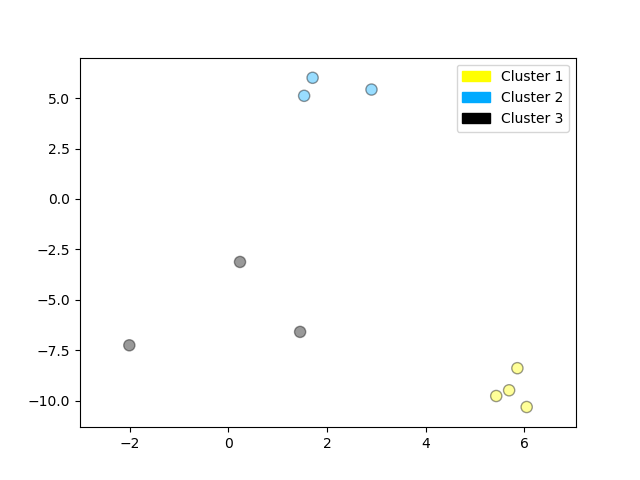

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [13]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


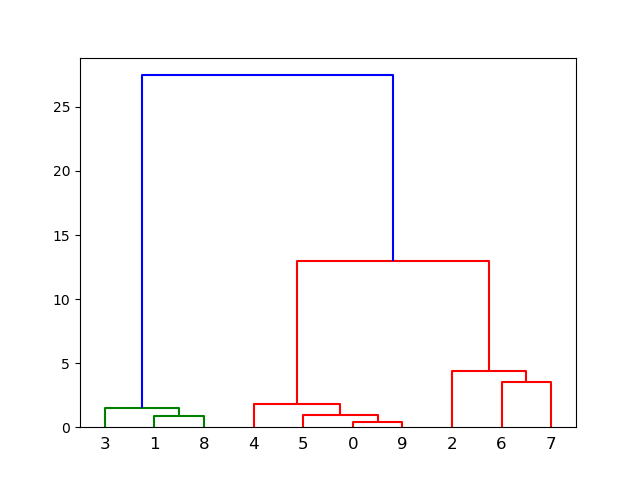

In [14]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

Note that you can tell how far apart the merged clusters are by the length of each branch of the tree. This property of a dendogram can help us figure out the right number of clusters. In general, we want clusters that have highly similar items within each cluster, but that are far apart from other clusters. 

### DBSCAN clustering

We're now going to give an overview of a third clustering method called **DBSCAN**. DBSCAN is an acronym that stands for **density-based spatial clustering of applications with noise**. One advantage of DBSCAN is that you don't need to specify the number of clusters in advance. Another advantage is that it works well with datasets that have more complex cluster shapes. It can also find points that are outliers that shouldn't reasonably be assigned to any cluster. DBSCAN is relatively efficient and can be used for large datasets. 

The main idea behind DBSCAN is that clusters represent areas in the dataspace that are more dense with data points, while being separated by regions that are empty or at least much less densely populated (this sentence makes no sense...). 

The two main parameters for DBSCAN are min samples and eps. All points that lie in a more dense region are called core samples. For a given data point, if there are min sample of other data points that lie within a distance of eps, that given data points is labeled as a core sample. Then, all core samples that are within a distance of eps units apart are put into the same cluster. 

In addition to points being categorized as core samples, points that don't end up belonging to any cluster are considered as noise. While points that are within a distance of eps units from core points, but not core points themselves, are termed boundary points. 

Here's an example of DBSCAN applied to a sample data set. As with the other clustering methods, DBSCAN is imported from the Sklearn cluster module. And just like with a agglomerative clustering, DBSCAN doesn't make cluster assignments from new data, so we use the fit predict method to cluster and get the cluster assignments back in one step. 

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


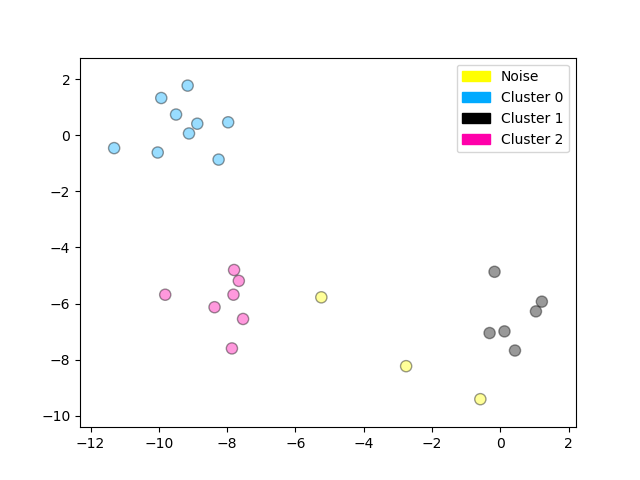

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

One consequence of not having the right settings of eps and min samples for your particular dataset might be that the cluster memberships returned by DBSCAN may all be assigned the label -1, which indicates noise. Basically, the EPS setting does implicitly control the number of clusters that are found. With DBSCAN, if you've scaled your data using a standard scalar or min-max scalar to make sure the feature values have comparable ranges, finding an appropriate value for eps is a bit easier to do.

One final note, make sure that when you use the cluster assignments from DBSCAN, you check for and handle the -1 noise value appropriately. Since this negative value might cause problems, for example, if the cluster assignment is used as an index into another array later on.